In [190]:
import numpy as np
import pandas as pd


In [191]:
col_nams = ["user","item","rating","timestamp"]

df = pd.read_csv("u.data",names = col_nams,sep='\t')

In [192]:
df.head()

,user,item,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [193]:
movies_titles = pd.read_csv("ml-100k/ml-100k/u.item",sep = "\|",header = None)
movies_titles.head()

C:\Users\SHIVAM MUKATI\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [194]:
movies_titles = movies_titles[[0,1]]

In [195]:
movies_titles.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [196]:
movies_titles.columns = ['item',"movie_names"]

In [197]:
movies_titles.head()

,item,movie_names
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [198]:
df = pd.merge(df,movies_titles,on ="item")

In [199]:
import matplotlib.pyplot as plt
import seaborn as sn

In [200]:
RatingsOfMovie = pd.DataFrame(df.groupby('movie_names').mean()['rating'])
RatingsOfMo


NameError: name 'RatingsOfMo' is not defined

In [201]:
RatingsOfMovie["NumOfRatings"] = pd.DataFrame(df.groupby('movie_names').count()['rating'])
print(RatingsOfMovie)

                                         rating  NumOfRatings
movie_names                                                  
'Til There Was You (1997)              2.333333             9
1-900 (1994)                           2.600000             5
101 Dalmatians (1996)                  2.908257           109
12 Angry Men (1957)                    4.344000           125
187 (1997)                             3.024390            41
...                                         ...           ...
Young Guns II (1990)                   2.772727            44
Young Poisoner's Handbook, The (1995)  3.341463            41
Zeus and Roxanne (1997)                2.166667             6
unknown                                3.444444             9
Á köldum klaka (Cold Fever) (1994)     3.000000             1

[1664 rows x 2 columns]


In [202]:
RatingsOfMovie.sort_values(by = 'rating',ascending=False)

,rating,NumOfRatings
movie_names,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


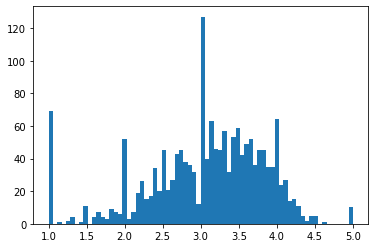

In [203]:
plt.hist(RatingsOfMovie['rating'],bins =70)
plt.show()

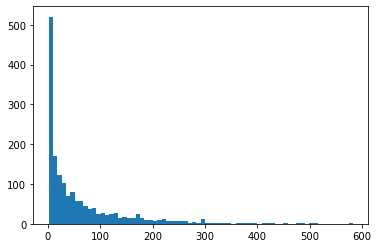

In [204]:
plt.hist(RatingsOfMovie["NumOfRatings"],bins =70 )
plt.show()

In [205]:
df.head()

,user,item,rating,timestamp,movie_names
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [206]:
movieMat = df.pivot_table(index = "user",columns="movie_names",values="rating")
movieMat.head()

movie_names,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [207]:
StarWarsUserData = movieMat['Star Wars (1977)']

In [208]:
CoRealtionOfStarWars = movieMat.corrwith(StarWarsUserData)
print(CoRealtionOfStarWars)

C:\Users\SHIVAM MUKATI\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\SHIVAM MUKATI\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


movie_names
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64


In [209]:
CorleationOfSW = pd.DataFrame(CoRealtionOfStarWars,columns=["Relations"])
CorleationOfSW.dropna(inplace = True)

In [210]:
CorleationOfSW.head()

,Relations
movie_names,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [211]:
CorleationOfSW = CorleationOfSW.join(RatingsOfMovie['NumOfRatings'])
CorleationOfSW.sort_values('Relations',ascending=False).head()

,Relations,NumOfRatings
movie_names,,
Man of the Year (1995),1.0,9
Hollow Reed (1996),1.0,6
Stripes (1981),1.0,5
"Beans of Egypt, Maine, The (1994)",1.0,2
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0,5


In [212]:
 CorleationOfSW[CorleationOfSW["NumOfRatings"]>=100].sort_values('Relations',ascending=False).head()

,Relations,NumOfRatings
movie_names,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [221]:
def predictMovie(Name):
        UserData = movieMat[Name]
        SimilarMovie = movieMat.corrwith(UserData)

        CoRealtionofMovie = pd.DataFrame(SimilarMovie,columns=["Relations"])
        CoRealtionofMovie.dropna(inplace = True)

        CorleationOfMovie = CoRealtionofMovie.join(RatingsOfMovie['NumOfRatings'])
        Prediction = CorleationOfMovie[CorleationOfMovie["NumOfRatings"]>=100].sort_values('Relations',ascending=False)
        return Prediction

In [223]:
prediction = predictMovie("Raiders of the Lost Ark (1981)")
print(prediction)

C:\Users\SHIVAM MUKATI\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\SHIVAM MUKATI\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


                                           Relations  NumOfRatings
movie_names                                                       
Raiders of the Lost Ark (1981)              1.000000           420
Indiana Jones and the Last Crusade (1989)   0.539606           331
Empire Strikes Back, The (1980)             0.538659           367
Star Wars (1977)                            0.536117           583
Back to the Future (1985)                   0.506807           350
...                                              ...           ...
Strictly Ballroom (1992)                   -0.112986           104
Lost Highway (1997)                        -0.123392           125
Boogie Nights (1997)                       -0.133154           189
Everyone Says I Love You (1996)            -0.139194           168
What's Eating Gilbert Grape (1993)         -0.184467           115

[338 rows x 2 columns]
